<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation, to understand the reasons for low participation rates in certain states, and to make recommendations about how the College Board might work to increase the participation rates.

The College Board, an organization that administers the SAT, looks at statewide SAT test participation rates.

Identify states with low SAT participation rates from 2017 to 2019 and provide recommendations to the College Board on how to improve them.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Datasets Selected

In this analysis, the datasets "2017-2019 ACT Scores by State" and "2017-2019 SAT Scores by State" were used.

Information found in the ACT Scores by State datasets includes the US state name, participation rates, scores for English, Math, Reading, Science and Composite Score (average of English,Math,Reading,Science). 

Information found in the SAT Scores by State datasets includes US state name, Evidence Based Reading and Writing (ERBW), Math, Total score (sum of ERBW and Math), and participation rates.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

### Outside Research

**Other Background Information** 
- 50 states in US
- ACT score range: max - 32, min - 1
- SAT score range: max - 1600, min - 800
- Test center counts. Google ACT/SAT test centre to find the test centre counts for the particular state. Data source: https://www.topschoolsintheusa.com/

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [111]:
# Code:
values = [7,2,4,3,9,12,10,2]
def cal_mean(values):
    ave = sum(values)/len(values)
    return ave

print(cal_mean(values))

6.125


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [112]:
# Code:

def cal_stddev(values):
    try:
        n = len(values)
        mu = cal_mean(values)
        x_i = sum((i-mu)**2 for i in values)
        
        std= (x_i/(n))**0.5
    
    except:    
        std = np.nan
        
    return std

print(cal_stddev(values))

3.6550478793033614


3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
def pct_to_dec(string):
    try: 
        dec = float(string.replace("%",''))/100
    except:
        dec = np.nan
    return dec
    
print(pct_to_dec("0.50%"))

0.005


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [113]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### "2017-2019 ACT Scores by State" Dataset

In [127]:
# Import dataset:
act_2017 = pd.read_csv('../data/act_2017.csv')

# 1. Display the data
display(act_2017.head())

# 2. Check for missing values
display(act_2017.info())

# 3 to 6.
# filtering out non-USA states
f1 = (act_2017['State'] != "National") & (act_2017['State'] != 'District of Columbia') 
act_2017_1 = act_2017[f1]

# Check on accuracy of composite column values, by taking mean of English/Math/Reading/Science columns
act_2017_1["score_2017"] = round(act_2017_1.loc[:,["English","Math","Reading","Science"]].mean(axis = 1),1)
act_2017_1["participation_rate"] = act_2017_1["Participation"].apply(pct_to_dec)

# 7,8.
# Removing columns that are not required
act_2017_final = act_2017_1.drop(["English","Math","Reading","Science","Participation","Composite"], axis = 1)

# Rename columns
act_2017_final.columns = act_2017_final.columns.str.lower()
act_2017_final.rename(columns = {
    "score_2017": "act_score_2017",
    "participation_rate": "act_part_2017"
}, inplace = True)
act_2017_final.index = range(len(act_2017_final.index))

display(act_2017_final.head())
act_2017_final.info()

State Participation  English  Math  Reading  Science Composite
0  National           60%     20.3  20.7     21.4     21.0      21.0
1   Alabama          100%     18.9  18.4     19.7     19.4      19.2
2    Alaska           65%     18.7  19.8     20.4     19.9      19.8
3   Arizona           62%     18.6  19.8     20.1     19.8      19.7
4  Arkansas          100%     18.9  19.0     19.7     19.5      19.4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


None

state  act_score_2017  act_part_2017
0     Alabama            19.1           1.00
1      Alaska            19.7           0.65
2     Arizona            19.6           0.62
3    Arkansas            19.3           1.00
4  California            22.6           0.31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           50 non-null     object 
 1   act_score_2017  50 non-null     float64
 2   act_part_2017   50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [126]:
# Import dataset:
act_2018 = pd.read_csv('../data/act_2018.csv')

# 1. Display the data
display(act_2018.head())

# 2. Check for missing values
display(act_2018.info())

# 3 to 6.
# filtering out non-USA states
act_2018_1 = act_2018.drop([8,20])

# fixing column types
act_2018_1["participation_rate"] = act_2018_1["Participation"].apply(pct_to_dec)

# 7,8.
# Removing participation column
act_2018_final = act_2018_1.drop(["Participation"], axis = 1)

# Rename Columns and Rows
act_2018_final.columns = act_2018_final.columns.str.lower()
act_2018_final.rename(columns = {
    'composite': 'act_score_2018',
    'participation_rate': 'act_part_2018'
}, inplace = True)
act_2018_final.index = range(len(act_2018_final.index))

display(act_2018_final.head())
act_2018_final.info()

State Participation  Composite
0     Alabama          100%       19.1
1      Alaska           33%       20.8
2     Arizona           66%       19.2
3    Arkansas          100%       19.4
4  California           27%       22.7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None

state  act_score_2018  act_part_2018
0     Alabama            19.1           1.00
1      Alaska            20.8           0.33
2     Arizona            19.2           0.66
3    Arkansas            19.4           1.00
4  California            22.7           0.27

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           50 non-null     object 
 1   act_score_2018  50 non-null     float64
 2   act_part_2018   50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [136]:
# Import dataset:
act_2019 = pd.read_csv('../data/act_2019.csv')

# 1. Display the data
display(act_2019.head())

# 2. Check for missing values
display(act_2019.info())

# 3 to 6.
# filtering out non-USA states
act_2019_1 = act_2019.drop([8,51])

# fixing column types
act_2019_1["participation_rate"] = act_2019_1["Participation"].apply(pct_to_dec)

# 7,8.
# Removing participation column 
act_2019_final = act_2019_1.drop(["Participation"], axis =1)

# Rename Columns and Rows
act_2019_final.columns = act_2019_final.columns.str.lower()
act_2019_final.rename(columns = {
    "composite": "act_score_2019",
    "participation_rate": "act_part_2019"
}, inplace = True)
act_2019_final.index = range(len(act_2019_final.index))

display(act_2019_final.head())
act_2019_final.info()

State Participation  Composite
0     Alabama          100%       18.9
1      Alaska           38%       20.1
2     Arizona           73%       19.0
3    Arkansas          100%       19.3
4  California           23%       22.6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None

state  act_score_2019  act_part_2019
0     Alabama            18.9           1.00
1      Alaska            20.1           0.38
2     Arizona            19.0           0.73
3    Arkansas            19.3           1.00
4  California            22.6           0.23

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           50 non-null     object 
 1   act_score_2019  50 non-null     float64
 2   act_part_2019   50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


### "2017-2019 SAT Scores by State" Dataset

In [125]:
# Import dataset:
sat_2017 = pd.read_csv('../data/sat_2017.csv')

# Display the data and check for missing values
display(sat_2017.head())
display(sat_2017.info())

# filter only US states
sat_2017_1 = sat_2017[sat_2017["State"] != "District of Columbia"]

# check on accuracy of total column values
sat_2017_1.loc[20,"Math"] = 524
sat_2017_1["sat_score"] = sat_2017_1.loc[:,["Evidence-Based Reading and Writing","Math"]].sum(axis = 1)

# change format of Participation column
sat_2017_1["sat_part"] = sat_2017["Participation"].apply(pct_to_dec)

# Format/Rename Columns and Rows
sat_2017_final = sat_2017_1.drop(["Participation","Total","Evidence-Based Reading and Writing","Math",], axis = 1)
sat_2017_final.columns = sat_2017_final.columns.str.lower()
sat_2017_final.rename(columns = {
    "sat_part": "sat_part_2017",
    "sat_score": "sat_score_2017"
}, inplace = True)
sat_2017_final.index = range(len(sat_2017_final))

display(sat_2017_final.head())
sat_2017_final.info()

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5%                                 593   572   1165
1      Alaska           38%                                 547   533   1080
2     Arizona           30%                                 563   553   1116
3    Arkansas            3%                                 614   594   1208
4  California           53%                                 531   524   1055

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


None

state  sat_score_2017  sat_part_2017
0     Alabama            1165           0.05
1      Alaska            1080           0.38
2     Arizona            1116           0.30
3    Arkansas            1208           0.03
4  California            1055           0.53

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           50 non-null     object 
 1   sat_score_2017  50 non-null     int64  
 2   sat_part_2017   50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [129]:
# Import dataset:
sat_2018 = pd.read_csv('../data/sat_2018.csv')

# Display the data and check for missing values
display(sat_2018.head())
display(sat_2018.info())

# filter only US states
sat_2018_1 = sat_2018[sat_2018["State"] != "District of Columbia"]

# check on accuracy of total column values
sat_2018_1["sat_score"] = sat_2018_1.loc[:,["Evidence-Based Reading and Writing","Math"]].sum(axis = 1)

# change format of participation column
sat_2018_1["sat_part"] = sat_2018["Participation"].apply(pct_to_dec)

# Format/Rename Columns and Rows
sat_2018_final = sat_2018_1.drop(["Participation","Total","Evidence-Based Reading and Writing","Math"], axis = 1)
sat_2018_final.columns = sat_2018_final.columns.str.lower()
sat_2018_final.rename(columns = {
    "sat_score": "sat_score_2018",
    "sat_part" : "sat_part_2018"
}, inplace = True)
sat_2018_final.index = range(len(sat_2018_final))

display(sat_2018_final.head())
sat_2018_final.info()

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


None

state  sat_score_2018  sat_part_2018
0     Alabama            1166           0.06
1      Alaska            1106           0.43
2     Arizona            1149           0.29
3    Arkansas            1168           0.05
4  California            1076           0.60

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           50 non-null     object 
 1   sat_score_2018  50 non-null     int64  
 2   sat_part_2018   50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [132]:
# Import dataset:
sat_2019 = pd.read_csv('../data/sat_2019.csv')

# Display the data and check for missing values
display(sat_2019.head())
display(sat_2019.info())

# filter only US states
sat_2019_1 = sat_2019[(sat_2019["State"] != "District of Columbia") & (sat_2019["State"] != "Puerto Rico") & (sat_2019["State"] != "Virgin Islands")]

# check on accuracy of total column values
sat_2019_1["sat_score"] = sat_2019_1.loc[:,["EBRW","Math"]].sum(axis = 1)

# change format of participation column
sat_2019_1["sat_part"] = sat_2019["Participation Rate"].apply(pct_to_dec)

# Format/Rename Columns and Rows
sat_2019_final = sat_2019_1.drop(["Participation Rate","Total","EBRW","Math"], axis = 1)
sat_2019_final.columns = sat_2019_final.columns.str.lower()
sat_2019_final.rename(columns = {
    "sat_score" : "sat_score_2019",
    "sat_part": "sat_part_2019"
}, inplace = True)
sat_2019_final.index = range(len(sat_2019_final))

display(sat_2019_final.head())
sat_2019_final.info()

State Participation Rate  EBRW  Math  Total
0     Alabama                 7%   583   560   1143
1      Alaska                41%   556   541   1097
2     Arizona                31%   569   565   1134
3    Arkansas                 6%   582   559   1141
4  California                63%   534   531   1065

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


None

state  sat_score_2019  sat_part_2019
0     Alabama            1143           0.07
1      Alaska            1097           0.41
2     Arizona            1134           0.31
3    Arkansas            1141           0.06
4  California            1065           0.63

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           50 non-null     object 
 1   sat_score_2019  50 non-null     int64  
 2   sat_part_2019   50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


### Merging Datasets

In [133]:
# merge 
df = pd.merge(act_2017_final, act_2018_final, how='left')
df_1 = pd.merge(df, act_2019_final, how = 'left')
df_2 = pd.merge(df_1,sat_2017_final, how = 'left')
df_3 = pd.merge(df_2,sat_2018_final, how = 'left')
df_final = pd.merge(df_3,sat_2019_final, how = 'left')
df_final.head()

state  act_score_2017  act_part_2017  act_score_2018  act_part_2018  \
0     Alabama            19.1           1.00            19.1           1.00   
1      Alaska            19.7           0.65            20.8           0.33   
2     Arizona            19.6           0.62            19.2           0.66   
3    Arkansas            19.3           1.00            19.4           1.00   
4  California            22.6           0.31            22.7           0.27   

   act_score_2019  act_part_2019  sat_score_2017  sat_part_2017  \
0            18.9           1.00            1165           0.05   
1            20.1           0.38            1080           0.38   
2            19.0           0.73            1116           0.30   
3            19.3           1.00            1208           0.03   
4            22.6           0.23            1055           0.53   

   sat_score_2018  sat_part_2018  sat_score_2019  sat_part_2019  
0            1166           0.06            1143           0.07  
1            1106           0.43            1097           0.41  
2            1149           0.29            1134           0.31  
3            1168           0.05            1141           0.06  
4            1076           0.60            1065           0.63

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**Dataset name: df_final**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*integer*|df_final|US state name.| 
|**act_score_year**|*float*|df_final|Composite ACT score: the average of a candidate's four section scores (English, Math, Reading, Science) from 2017 to 2019. Each sections are graded separately from 1 to 36. |
|**act_part_year**|*float*|df_final|The participation rate for ACT tests per year, from 2017 to 2019.| 
|**sat_score_year**|*integer*|df_final|Total SAT score of two sections for candidate (Evidence-Based Reading and Writing, Math) from 2017 to 2019. Each section is graded separately from 200 to 800. Total SAT score ranges from 400 to 1600|
|**sat_part_year**|*float*|df_final|The participation rate for SAT tests per year, from 2017 to 2019.| 

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [12]:
#1. Summary statistics
df_final.describe()

act_score_2017  act_part_2017  act_score_2018  act_part_2018  \
count        50.00000      50.000000       50.000000      50.000000   
mean         21.23600       0.659200       21.454000       0.623200   
std           2.03086       0.321107        2.111312       0.341141   
min          17.60000       0.080000       17.700000       0.070000   
25%          19.70000       0.310000       19.925000       0.277500   
50%          20.95000       0.710000       21.050000       0.660000   
75%          22.57500       1.000000       23.650000       1.000000   
max          25.40000       1.000000       25.600000       1.000000   

       act_score_2019  act_part_2019  sat_score_2017  sat_part_2017  \
count       50.000000      50.000000       50.000000      50.000000   
mean        21.424000       0.592000     1129.520000       0.386000   
std          2.197267       0.346534       89.909533       0.345602   
min         17.900000       0.060000      995.000000       0.020000   
25%         19.800000       0.242500     1057.000000       0.040000   
50%         20.950000       0.585000     1107.000000       0.340000   
75%         23.750000       1.000000     1213.250000       0.650000   
max         25.500000       1.000000     1295.000000       1.000000   

       sat_score_2018  sat_part_2018  sat_score_2019  sat_part_2019  
count       50.000000      50.000000       50.000000      50.000000  
mean      1122.780000       0.448200     1115.760000       0.481600  
std         92.884016       0.370976       96.144993       0.386002  
min        997.000000       0.020000      943.000000       0.020000  
25%       1062.250000       0.042500     1048.000000       0.052500  
50%       1098.000000       0.500000     1099.000000       0.525000  
75%       1207.000000       0.745000     1215.250000       0.817500  
max       1298.000000       1.000000     1284.000000       1.000000

ACT observations:
- mean/median scores across 2017 to 2019 do not change much.
- decreasing mean/median participation rates across 2017 to 2019

SAT observations:
- decreased median/mean score trend across 2017 to 2019
- increased median participation rates across 2017 to 2019 

In [13]:
#2.
sd = {key:round(cal_stddev(column),1) for (key,column) in df_final.items()}
sd

{'state': nan,
 'act_score_2017': 2.0,
 'act_part_2017': 0.3,
 'act_score_2018': 2.1,
 'act_part_2018': 0.3,
 'act_score_2019': 2.2,
 'act_part_2019': 0.3,
 'sat_score_2017': 89.0,
 'sat_part_2017': 0.3,
 'sat_score_2018': 92.0,
 'sat_part_2018': 0.4,
 'sat_score_2019': 95.2,
 'sat_part_2019': 0.4}

There are some slight differences in calculated std values from the std values from .describe() method. However differences are minimal

ACT observation:
- Minimal changes in variation of data 
SAT observations:
- Minimal changes in variation of data


In [14]:
#3
#Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
part_rates = df_final.drop(df_final.iloc[:,range(1,12,2)], axis = 1)
part_rates.sort_values("act_part_2017",ascending = True).head()
part_rates.sort_values("act_part_2018",ascending = False).head()
part_rates.sort_values("act_part_2019",ascending = False).head()
part_rates.sort_values("sat_part_2017",ascending = False).head()
part_rates.sort_values("sat_part_2018",ascending = False).head() 
part_rates.sort_values("sat_part_2019",ascending = False).head()

#Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
scores = df_final.drop(df_final.iloc[:,range(2,13,2)], axis = 1)
scores.sort_values("act_score_2017",ascending = False).head()
scores.sort_values("act_score_2018",ascending = True).head()
scores.sort_values("act_score_2019",ascending = False).head()
scores.sort_values("sat_score_2017",ascending = True).head()
scores.sort_values("sat_score_2018",ascending = False).head()
scores.sort_values("sat_score_2019",ascending = True).head()

#Which states with highest and lowest average (across all 3 years) total/composite scores
scores["act_ave_score"] = round(scores.iloc[:,range(1,4)].mean(axis = 1),1)
scores["sat_ave_score"] = round(scores.iloc[:,range(4,6)].mean(axis = 1))
scores_1 = scores.drop(scores.columns[1:7], axis = 1)
scores_1.sort_values("act_ave_score",ascending = False).head() #act - lowest: Nevada (17.7), Highest: Connecticut/Massachusetts (25.4)
scores_1.sort_values("sat_ave_score", ascending = False).head() #sat - lowest: Delaware (996), Highest: Minnesota (1296)

Observation: states with higher ACT participation rates usually are observed with lower SAT participation rates  
act_2017 
- highest 5 participation: Alabama, Kentucky, Wisconsin, Utah, Tennessee
- highest 5 score: New Hampshire, Massachusetts, Connecticut, Maine, New York
- lowest 5 participation: Maine, Delaware, New Hampshire,Rhode Island, Pennsylvania
- lowest 5 score: Nevada, Maryland, Mississippi, South Carolina, Hawaii

act_2018
- highest 5 participation: Alabama, Kentucky, Wisconsin, Utah, Tennessee
- highest 5 score: Connecticut, Massachusetts, New Hampshire, New York, Michigan
- lowest 5 participation: Maine, Rhode Island, New Hampshire, Delaware, Pennsylvania
- lowest 5 score: Nevada, South Carolina, Mississippi, Hawaii, Alabama

act_2019 
- highest 5 participation: Alabama, Kentucky, Wisconsin, Utah, Tennessee
- highest 5 score: Connecticut, Massachusetts, New Hampshire, Rhode Islans, New York
- lowest 5 participation: Maine, Rhode Island, Delaware, New Hampshire, Pennsylvania
- lowest 5 score: Nevada, Mississippi, South Carolina, Louisiana, Alabama

sat_2017 
- highest 5 participation: Michigan, Connecticut, Delaware, New Hampshire, Maine 
- highest 5 score: Minnesota, Wisconsin, Iowa, Missouri, Kansas
- lowest 5 participation: North Dakota, Mississippi, lowa, Missouri, Utah
- lowest 5 score: Delaware, Michigan, Idaho, Maine, Florida

sat_2018
- highest 5 participation: Colorado, Connecticut, Delaware, Michigan, Idaho
- highest 5 score: Minnesota, Wisconsin, North Dakota, Iowa, Kansas
- lowest 5 participation: North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin
- lowest 5 score: Delaware, West Virginia, Idaho, Michigan, Utah

sat_2019
- highest 5 participation: Michigan, Colorado, Connecticut, Delaware, Florida
- highest 5 score: Minnesota, Wisconsin, South Dakota, North Dakota, Nebraska
- lowest 5 participation: North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin
- lowest 5 score: West Virginia, Oklahoma, Delaware, Idaho, Rhode Island

In [141]:
#4 
#Do any states with 100% participation on a given test have a rate change year-to-year?
part_rates["act_ave_part"] = round(part_rates.iloc[:,range(1,4)].mean(axis = 1),2)
part_rates["sat_ave_part"] = round(part_rates.iloc[:,range(4,7)].mean(axis = 1),2)

#act: 2017 100% 
act_pr100 = part_rates[part_rates["act_part_2017"] == 1.00].drop(["sat_part_2017","sat_part_2018","sat_part_2019","sat_ave_part"], axis = 1)
act_pr100["act_rc_1817"] = round((act_pr100["act_part_2017"]-act_pr100["act_part_2018"])/act_pr100["act_part_2017"],2)
display(act_pr100.sort_values("act_rc_1817",ascending = False).head()) #states with rate change: Colorado, Minnesota

#act: 2018 100%
act_pr100["act_rc_1918"] = round((act_pr100["act_part_2018"]-act_pr100["act_part_2019"])/act_pr100["act_part_2018"],2)
display(act_pr100.sort_values("act_rc_1918",ascending = False).head()) #states with rate change: South Carolina, Missouri, Colorado, Minnesota

#sat: 2017 100%
sat_pr100 = part_rates[part_rates["sat_part_2017"] == 1.00].drop(["act_part_2017","act_part_2018","act_part_2019","act_ave_part"], axis = 1)
sat_pr100 # no rate change for states with 100%

display(sat_pr100.head())

state  act_part_2017  act_part_2018  act_part_2019  act_ave_part  \
5         Colorado            1.0           0.30           0.27          0.52   
22       Minnesota            1.0           0.99           0.95          0.98   
0          Alabama            1.0           1.00           1.00          1.00   
32  North Carolina            1.0           1.00           1.00          1.00   
48       Wisconsin            1.0           1.00           1.00          1.00   

    act_rc_1817  
5          0.70  
22         0.01  
0          0.00  
32         0.00  
48         0.00

state  act_part_2017  act_part_2018  act_part_2019  act_ave_part  \
39  South Carolina            1.0           1.00           0.78          0.93   
24        Missouri            1.0           1.00           0.82          0.94   
5         Colorado            1.0           0.30           0.27          0.52   
22       Minnesota            1.0           0.99           0.95          0.98   
0          Alabama            1.0           1.00           1.00          1.00   

    act_rc_1817  act_rc_1918  
39         0.00         0.22  
24         0.00         0.18  
5          0.70         0.10  
22         0.01         0.04  
0          0.00         0.00

state  sat_part_2017  sat_part_2018  sat_part_2019  sat_ave_part
6   Connecticut            1.0            1.0            1.0           1.0
7      Delaware            1.0            1.0            1.0           1.0
21     Michigan            1.0            1.0            1.0           1.0

Do any states with 100% participation on a given test have a rate change year-to-year?
- act_2017: Colorado, Minnesota
- act_2018: South Carolina, Missouri, Colorado, Minnesota
- sat: No rate change for states with 100%

In [144]:
#5 Do any states have >50% participation on both tests each year?
#2017
df_2017 = part_rates[(part_rates["act_part_2017"] >0.5) & (part_rates["sat_part_2017"] >0.5)] 
display(df_2017) #Florida, Georgia, Hawaii

#2018
df_2018 = part_rates[(part_rates["act_part_2018"] >0.5) & (part_rates["sat_part_2018"] >0.5)] 
display(df_2018) #Florida, Georgia, Hawaii, North Carolina, South Carolina

#2019
df_2019 = part_rates[(part_rates["act_part_2019"] >0.5) & (part_rates["sat_part_2019"] >0.5)]
display(df_2019) #Florida, Hawaii, North Carolina, South Carolina

state  act_part_2017  act_part_2018  act_part_2019  sat_part_2017  \
8   Florida           0.73           0.66           0.54           0.83   
9   Georgia           0.55           0.53           0.49           0.61   
10   Hawaii           0.90           0.89           0.80           0.55   

    sat_part_2018  sat_part_2019  act_ave_part  sat_ave_part  
8            0.56           1.00          0.64          0.80  
9            0.70           0.71          0.52          0.67  
10           0.56           0.54          0.86          0.55

state  act_part_2017  act_part_2018  act_part_2019  \
8          Florida           0.73           0.66           0.54   
9          Georgia           0.55           0.53           0.49   
10          Hawaii           0.90           0.89           0.80   
32  North Carolina           1.00           1.00           1.00   
39  South Carolina           1.00           1.00           0.78   

    sat_part_2017  sat_part_2018  sat_part_2019  act_ave_part  sat_ave_part  
8            0.83           0.56           1.00          0.64          0.80  
9            0.61           0.70           0.71          0.52          0.67  
10           0.55           0.56           0.54          0.86          0.55  
32           0.49           0.52           0.51          1.00          0.51  
39           0.50           0.55           0.68          0.93          0.58

state  act_part_2017  act_part_2018  act_part_2019  \
8          Florida           0.73           0.66           0.54   
10          Hawaii           0.90           0.89           0.80   
32  North Carolina           1.00           1.00           1.00   
39  South Carolina           1.00           1.00           0.78   

    sat_part_2017  sat_part_2018  sat_part_2019  act_ave_part  sat_ave_part  
8            0.83           0.56           1.00          0.64          0.80  
10           0.55           0.56           0.54          0.86          0.55  
32           0.49           0.52           0.51          1.00          0.51  
39           0.50           0.55           0.68          0.93          0.58

States with >50% participation rates for both SAT and ACT tests each year
- 2017 - Florida, Georgia, Hawaii 
- 2018 - Florida, Georgia, Hawaii, North Carolina, South Carolina
- 2019 - Florida, Hawaii, North Carolina, South Carolina

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [18]:
df_1 = df_final.iloc[:,[0,1,3,5,7,9,11]]
df_2 = df_final.iloc[:,range(0,13,2)]
df_merge = pd.merge(df_1,df_2, how = "left")
df_merge.head()

state  act_score_2017  act_score_2018  act_score_2019  sat_score_2017  \
0     Alabama            19.1            19.1            18.9            1165   
1      Alaska            19.7            20.8            20.1            1080   
2     Arizona            19.6            19.2            19.0            1116   
3    Arkansas            19.3            19.4            19.3            1208   
4  California            22.6            22.7            22.6            1055   

   sat_score_2018  sat_score_2019  act_part_2017  act_part_2018  \
0            1166            1143           1.00           1.00   
1            1106            1097           0.65           0.33   
2            1149            1134           0.62           0.66   
3            1168            1141           1.00           1.00   
4            1076            1065           0.31           0.27   

   act_part_2019  sat_part_2017  sat_part_2018  sat_part_2019  
0           1.00           0.05           0.06           0.07  
1           0.38           0.38           0.43           0.41  
2           0.73           0.30           0.29           0.31  
3           1.00           0.03           0.05           0.06  
4           0.23           0.53           0.60           0.63

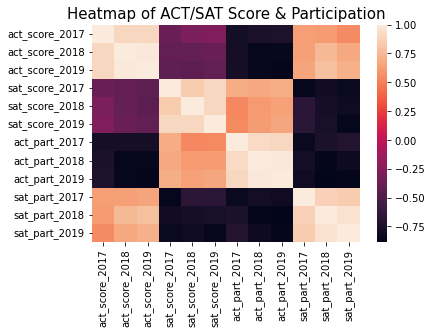

In [19]:
# heatmap
data_corr = df_merge.corr()
sns.heatmap(data_corr)
plt.title("Heatmap of ACT/SAT Score & Participation", fontsize = 15)
plt.show()

Heatmap Analysis:
- Strong correlation between ACT vs SAT participation for each year
- Strong correlation between ACT participation and ACT score (similar for SAT) 

Text(0.5, 0, 'Participation Rate')

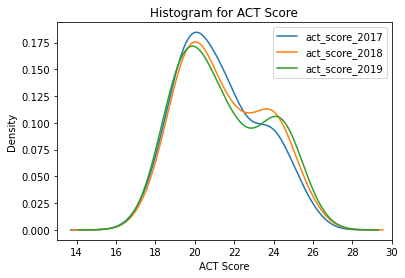

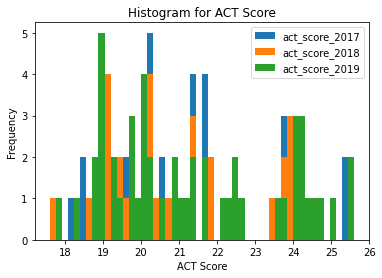

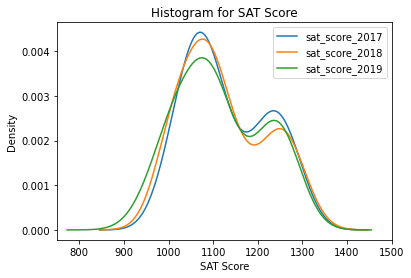

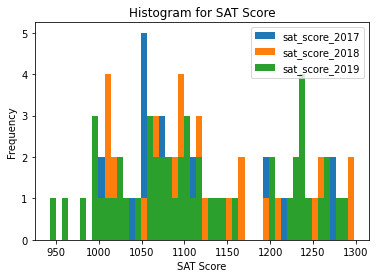

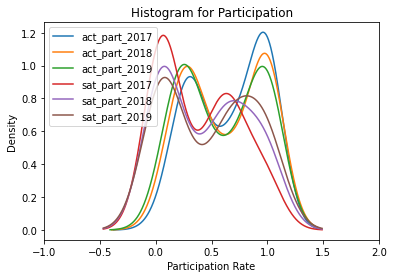

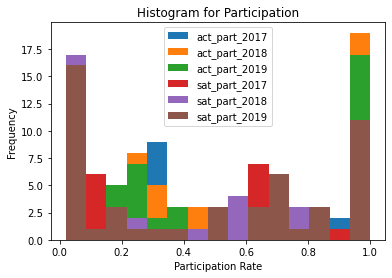

In [20]:
df_s_act = df_1.iloc[:, range(0,4)]
df_s_sat = df_1.iloc[:,[0,4,5,6]]

df_s_act.plot(kind='density', xlim = (13,30))
plt.title("Histogram for ACT Score")
plt.xlabel("ACT Score")

df_s_act.plot(kind='hist', bins = 50)
plt.title("Histogram for ACT Score")
plt.xlabel("ACT Score")

df_s_sat.plot(kind='density', xlim = (750,1500))
plt.title("Histogram for SAT Score")
plt.xlabel("SAT Score")

df_s_sat.plot(kind='hist', bins = 50)
plt.title("Histogram for SAT Score")
plt.xlabel("SAT Score")

df_2.plot(kind='density', xlim = (-1,2))
plt.title("Histogram for Participation")
plt.xlabel("Participation Rate")

df_2.plot(kind='hist', bins = 15)
plt.title("Histogram for Participation")
plt.xlabel("Participation Rate")

#Summarize the underlying distributions of your features (in words & statistics)

- Observe that the distribution for both score and participation rates for SAT/ACT across the years were not normally distributed. 
- For a normal distribution, the usual observation would be a peak at the mean value of the sample data set. However, what was observed for each data set, were dual peaks.
- CLT would still be applicable with more data added for analysis.

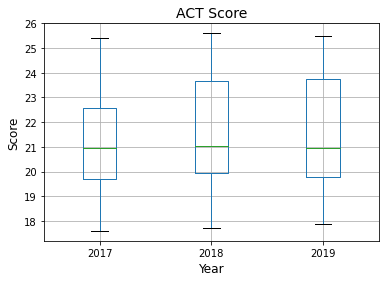

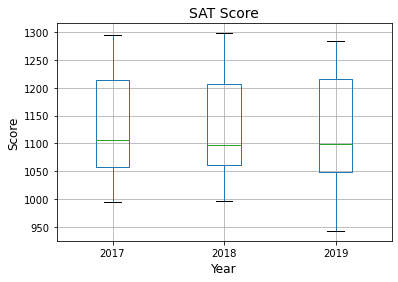

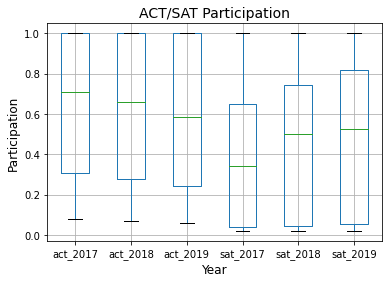

In [21]:
#Plot and interpret boxplots.
df_s_act.columns = [col.replace("act_score_","") for col in df_s_act.columns]

df_s_sat.columns = [col.replace("sat_score_","") for col in df_s_sat.columns]

df_p = df_2
df_p.columns = [col.replace("part_","") for col in df_p.columns]

df_s_act.boxplot()
plt.title("ACT Score", fontsize = 14);
plt.xlabel('Year', fontsize = 12);
plt.ylabel('Score', fontsize = 12)
plt.show()

df_s_sat.boxplot()
plt.title("SAT Score", fontsize = 14);
plt.xlabel('Year', fontsize = 12);
plt.ylabel('Score', fontsize = 12)
plt.show()

df_p.boxplot()
plt.title("ACT/SAT Participation", fontsize = 14);
plt.xlabel('Year', fontsize = 12);
plt.ylabel('Participation', fontsize = 12)
plt.show()


Observations:
- No major change in median SAT/ACT scores across the 3 years.
- However it can be observed that the 2019 SAT score's max and min values were lower incomparison to the past 2 years.
- Observe that ACT/SAT participation rates have an inverse correlation. Decreasing ACT participation rates across the years with and an increase in SAT participation rates.

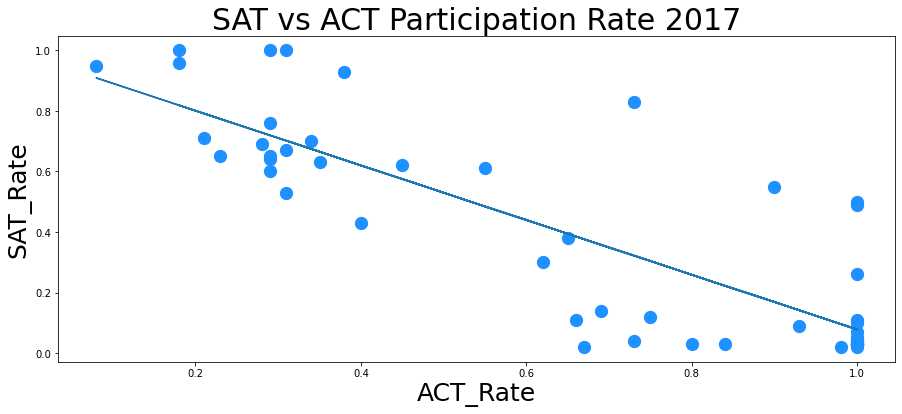

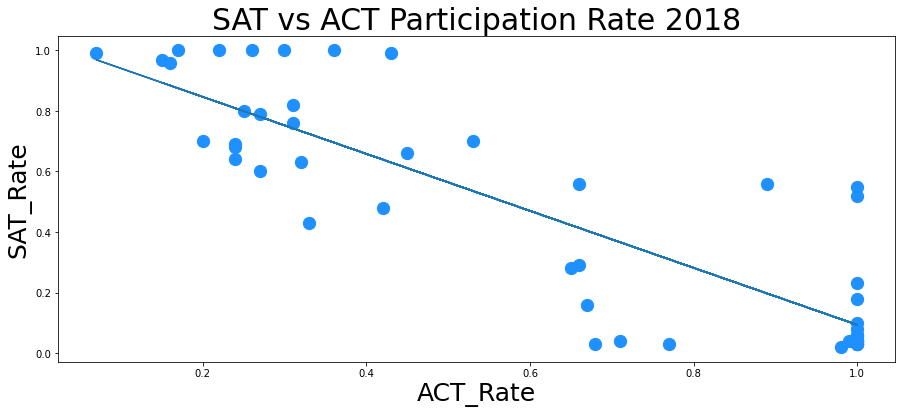

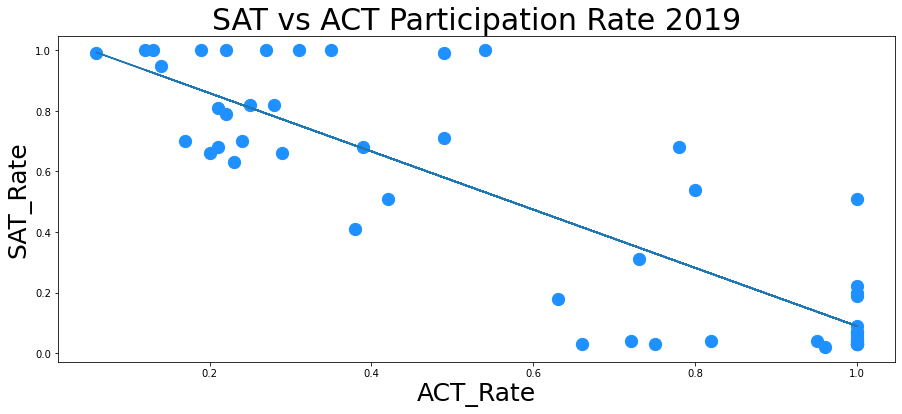

In [66]:
#Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.

df_merge.plot(x='act_part_2017', y='sat_part_2017', kind='scatter', color='dodgerblue',
        figsize=(15,6), s=150);
plt.title("SAT vs ACT Participation Rate 2017", fontsize = 30)
plt.xlabel("ACT_Rate", fontsize = 25)
plt.ylabel("SAT_Rate", fontsize = 25)
x = df_merge['act_part_2017']
y = df_merge['sat_part_2017']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))

df_merge.plot(x='act_part_2018', y='sat_part_2018', kind='scatter', color='dodgerblue',
        figsize=(15,6), s=150);
plt.title("SAT vs ACT Participation Rate 2018", fontsize = 30)
plt.xlabel("ACT_Rate", fontsize = 25)
plt.ylabel("SAT_Rate", fontsize = 25)
x = df_merge['act_part_2018']
y = df_merge['sat_part_2018']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))

df_merge.plot(x='act_part_2019', y='sat_part_2019', kind='scatter', color='dodgerblue',
        figsize=(15,6), s=150);
plt.title("SAT vs ACT Participation Rate 2019", fontsize = 30)
plt.xlabel("ACT_Rate", fontsize = 25)
plt.ylabel("SAT_Rate", fontsize = 25)
x = df_merge['act_part_2019']
y = df_merge['sat_part_2019']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))

Observation:
- SAT and ACT participation rates are inversely correlated. We can observe that an increase in SAT participation rates would lead to a decrease in ACT rates. 
- Inverse correlation between SAT and ACT participation rates, as generally students will choose either to do SAT or ACT. Even though there could be students who take on both SAT and ACT tests, so that they will be able to select the test score with a better grade, for college admissions. 

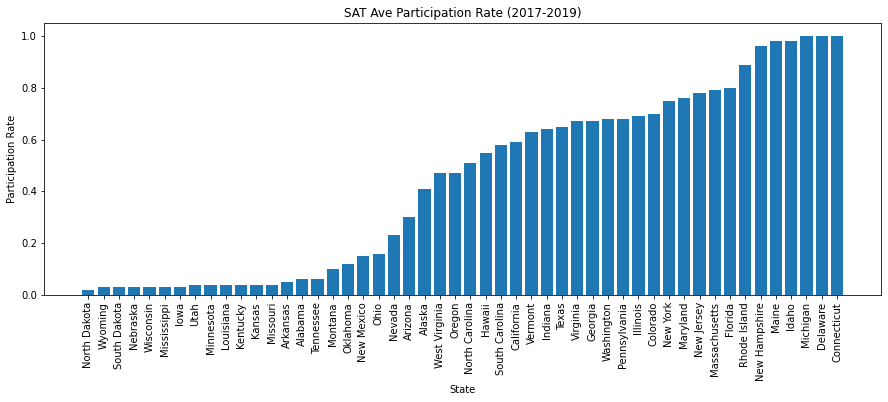

In [23]:
#2017 to 2019 SAT average participation rates
sat_avepr = part_rates.sort_values("sat_ave_part",ascending = True).drop(part_rates.iloc[:,[1,2,3,4,5,6,7]], axis = 1)
x = sat_avepr["state"]
y = sat_avepr['sat_ave_part']

#Increase the width of chart
plt.figure(figsize = (15,5))

plt.bar(x,y)
plt.title("SAT Ave Participation Rate (2017-2019)")
plt.xlabel("State")
plt.ylabel("Participation Rate")
plt.xticks(rotation = 90)

sat_avepr.index = range(len(sat_avepr))
sat_avepr.head(8).style.set_caption("SAT Ave Participation Rates (2017-2019)")

Observations:
- States with very low SAT participation rates of 2-3%, are generally states located at the Central Northern side of US â€“ e.g. North Dakota, Wyoming, South Dakota.


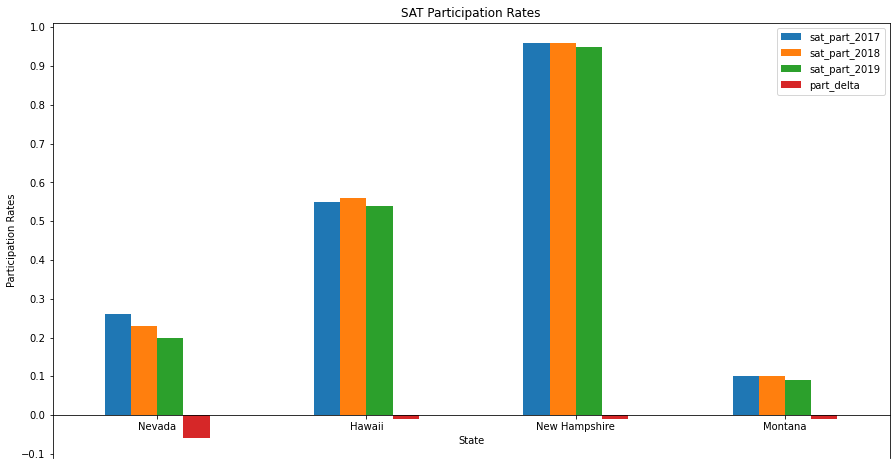

In [24]:
#States with decreasing participation rates (across 2017 to 2019)
d_pr = part_rates.drop(part_rates.iloc[:,[1,2,3,7,8]], axis = 1)
d_pr["part_delta"] = d_pr["sat_part_2019"] - d_pr["sat_part_2017"]
d_pr_sort = d_pr.sort_values("part_delta",ascending = True)
d_pr_sort.index = range(len(d_pr_sort.index))

d_pr_sort.groupby("state").mean().sort_values("part_delta").head(4).plot(kind = 'bar', figsize = (15,8)).spines['bottom'].set_position('zero')
plt.yticks([-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title("SAT Participation Rates")
plt.xlabel("State")
plt.ylabel("Participation Rates")
d_pr_sort.head(4).style.set_caption("SAT Participation Rates")

Observations:
- minimal changes for states with decreased SAT participation rates from 2017 to 2019

Text(0, 0.5, 'Participation Rate')

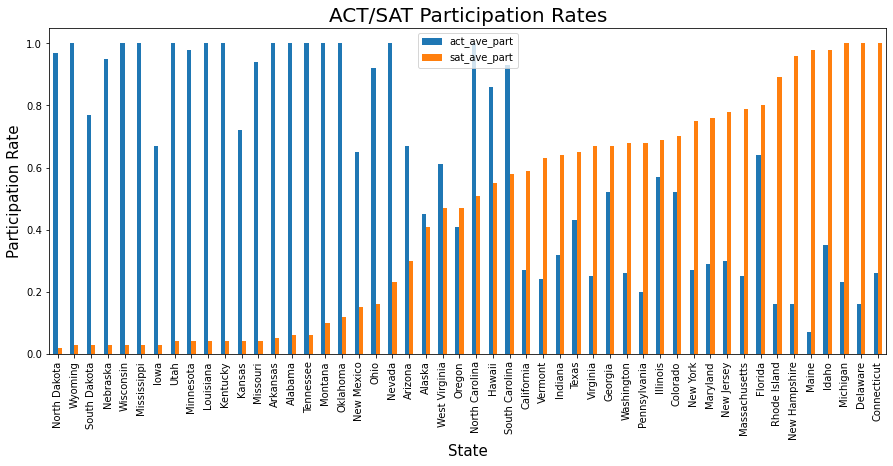

In [63]:
ave_data = part_rates.drop(part_rates.iloc[:,range(1,7)],axis = 1)

ave_data.groupby("state").mean().sort_values("sat_ave_part").plot(kind = 'bar', figsize = (15,6))
ave_data.head()
plt.title("ACT/SAT Participation Rates", fontsize = 20)
plt.xlabel("State", fontsize = 15)
plt.ylabel("Participation Rate", fontsize = 15)

Observations:

- The charts above show the relationship between SAT participation and SAT scores for each year. It can be observed that there is an inverse correlation between SAT score and participation rates. This means that states with lower SAT participation rates tend to have better SAT scores.

- States with higher participation rates would mean that a greater proportion of average college bound students are taking the SAT test, which in turn results in a lower average SAT score. We can also make a further inference that states with high average SAT scores and low participation rates, could indicate that an average student from the state is less confident and willing to take the SAT test.

state  act_score_2017  act_score_2018  act_score_2019  sat_score_2017  \
0     Alabama            19.1            19.1            18.9            1165   
1      Alaska            19.7            20.8            20.1            1080   
2     Arizona            19.6            19.2            19.0            1116   
3    Arkansas            19.3            19.4            19.3            1208   
4  California            22.6            22.7            22.6            1055   

   sat_score_2018  sat_score_2019  act_part_2017  act_part_2018  \
0            1166            1143           1.00           1.00   
1            1106            1097           0.65           0.33   
2            1149            1134           0.62           0.66   
3            1168            1141           1.00           1.00   
4            1076            1065           0.31           0.27   

   act_part_2019  sat_part_2017  sat_part_2018  sat_part_2019  
0           1.00           0.05           0.06           0.07  
1           0.38           0.38           0.43           0.41  
2           0.73           0.30           0.29           0.31  
3           1.00           0.03           0.05           0.06  
4           0.23           0.53           0.60           0.63

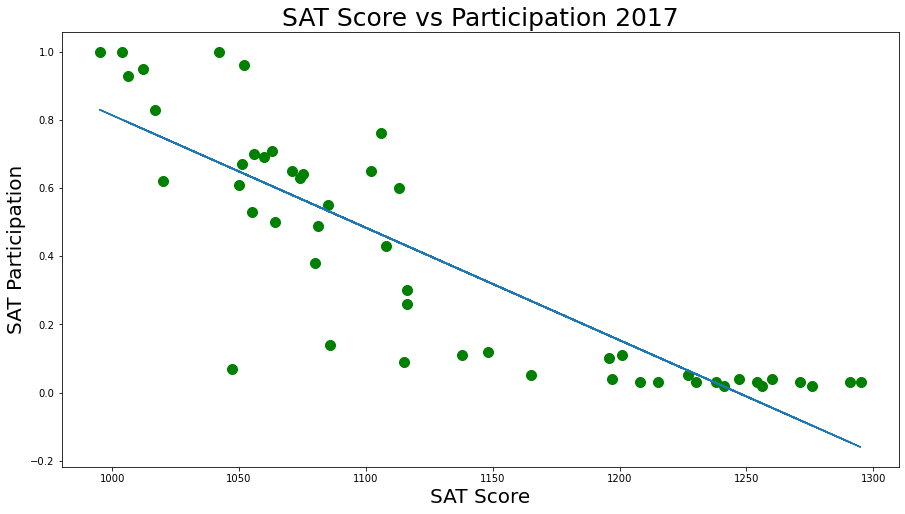

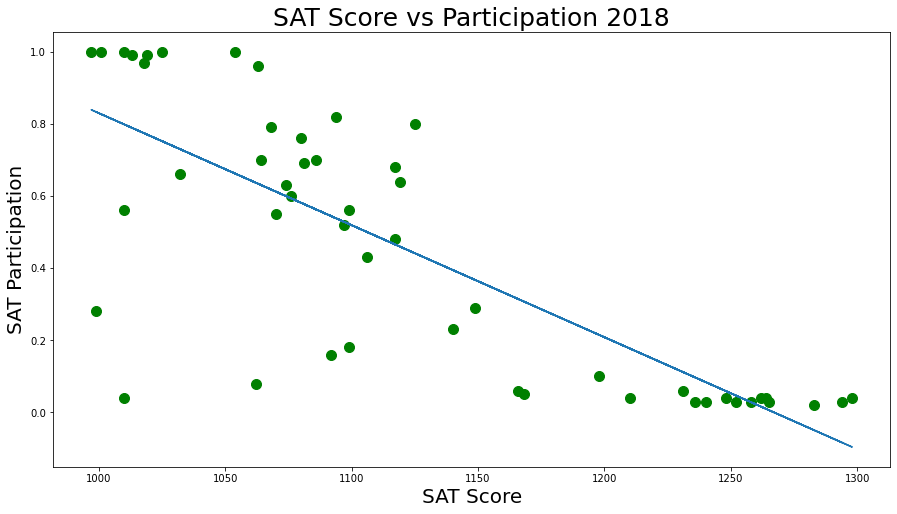

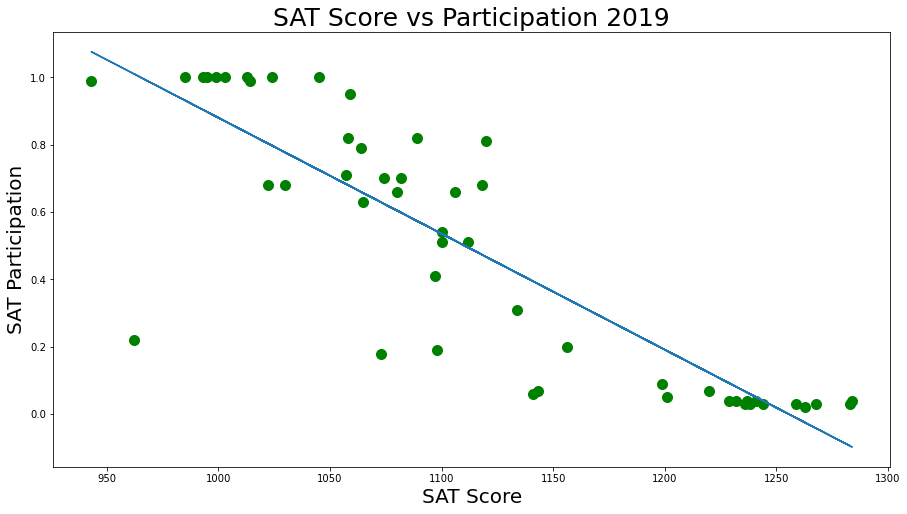

In [82]:
df_merge1 = df_merge.loc[:,["sat_score_2017","sat_score_2018","sat_score_2019","sat_part_2017","sat_part_2018","sat_part_2019"]]
df_merge1.head()
df_merge1.plot(x='sat_score_2017', y='sat_part_2017', kind='scatter', color='green', figsize=(15,8), s=100);
x = df_merge1['sat_score_2017']
y = df_merge1['sat_part_2017']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))
plt.title("SAT Score vs Participation 2017",fontsize = 25)
plt.xlabel("SAT Score", fontsize = 20)
plt.ylabel("SAT Participation", fontsize = 20)

df_merge1.plot(x='sat_score_2018', y='sat_part_2018', kind='scatter', color='green', figsize=(15,8), s=100);
x = df_merge1['sat_score_2018']
y = df_merge1['sat_part_2018']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))
plt.title("SAT Score vs Participation 2018",fontsize = 25)
plt.xlabel("SAT Score", fontsize = 20)
plt.ylabel("SAT Participation", fontsize = 20)

df_merge1.plot(x='sat_score_2019', y='sat_part_2019', kind='scatter', color='green', figsize=(15,8), s=100);
x = df_merge1['sat_score_2019']
y = df_merge1['sat_part_2019']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))
plt.title("SAT Score vs Participation 2019", fontsize = 25)
plt.xlabel("SAT Score", fontsize = 20)
plt.ylabel("SAT Participation", fontsize = 20)


Observations:
- The charts above show the relationship between SAT participation and SAT scores for each year. It can be observed that there is an inverse correlation between SAT score and participation rates. This means that states with lower SAT participation rates tend to have better SAT scores.

- States with higher participation rates would mean that a greater proportion of average college bound students are taking the SAT test, which in turn results in a lower average SAT score. We can also make a further inference that states with high average SAT scores and low participation rates, could indicate that an average student from the state is less confident and willing to take the SAT test. 

## Conclusions and Recommendations

Key Takeaways:
- Inverse correlation between SAT and ACT participation rates, as generally students will choose either to do SAT or ACT.
- Inverse correlation between SAT score and participation rates. States with lower participation rates tend to have better SAT scores. Higher participation rates means a greater proportion of average college bound students taking the SAT test, which lowers the average SAT scores. States with high average SAT scores and low participation rates, could indicate that an average student from the state is less confident or willing to take the SAT test. 

Recommendations:
- States to target: North Dakota/Wyoming/South Dakota.
- Increase outreach programs to schools in states with low SAT participation, targeting states with low SAT related resources such as test centres.
- Educate on SAT test requirements, and inform on how widely SAT results are accepted in US colleges.
- Provide additional teaching resources and materials to improve confidence of students in states with high SAT scores, but low participation rates


Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!